# Demo Analysis: Random Jet Sample

This notebook demonstrates v0.2-dev observables on synthetic jets in the HEPSIM-style workflow context.

## Setup
We generate random constituent 4-vectors and compute scalar observables per jet.

In [1]:
from pathlib import Path
import sys

_root = Path().resolve()
if not (_root / 'jet_observables').exists():
    _root = _root.parent
sys.path.insert(0, str(_root / 'jet_observables'))

import numpy as np
import matplotlib.pyplot as plt

from jetobsmc.jet import Jet
from jetobsmc.observables.shapes import jet_width

In [2]:
rng = np.random.default_rng(42)
n_jets = 500
jets = []

for _ in range(n_jets):
    n = int(rng.integers(8, 40))
    px = rng.normal(0.0, 25.0, size=n)
    py = rng.normal(0.0, 25.0, size=n)
    pz = rng.normal(0.0, 35.0, size=n)
    p2 = px * px + py * py + pz * pz
    E = np.sqrt(p2 + rng.uniform(0.0, 20.0, size=n))
    particles = np.column_stack([E, px, py, pz])
    jets.append(Jet(particles))

In [3]:
masses = np.array([j.mass() for j in jets])
pts = np.array([j.pt() for j in jets])
widths = np.array([jet_width(j) for j in jets])

## Distributions
Mass, transverse momentum, and width are shown below as a compact exploratory summary.

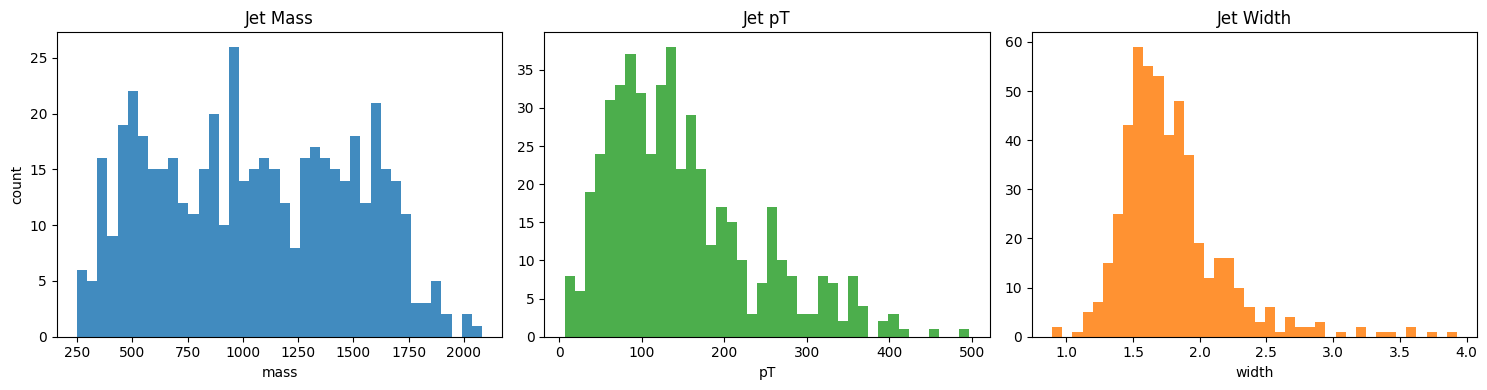

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(masses, bins=40, color='tab:blue', alpha=0.85)
axes[0].set_title('Jet Mass')
axes[0].set_xlabel('mass')
axes[0].set_ylabel('count')

axes[1].hist(pts, bins=40, color='tab:green', alpha=0.85)
axes[1].set_title('Jet pT')
axes[1].set_xlabel('pT')

axes[2].hist(widths, bins=40, color='tab:orange', alpha=0.85)
axes[2].set_title('Jet Width')
axes[2].set_xlabel('width')

plt.tight_layout()
plt.show()